In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pqcd.pQCD import pQCD


In [5]:
n_end = 10

samples = np.load(f"/home/sam/thesis/thesiscode/results/eos_samples/{n_end}ns_constraining_eos.npy")

X_hats = np.load(f"/home/sam/thesis/thesiscode/results/eos_samples/{n_end}ns_constraining_renormscale.npy")

edens = samples[0]/1000 #GeV/fm^-3
prezzes = samples[1]/1000 #GeV/fm^-3

weights = np.array([int(pQCD(np.exp(X_hat)).constraints(e0=eden[-1], p0=prezz[-1], n0=n_end*0.16))
                    for X_hat, eden, prezz in zip(X_hats, edens, prezzes)])

In [8]:
int(pQCD(np.exp(X_hats[2])).constraints(e0=edens[2][-1], p0=prezzes[2][-1], n0=n_end*0.16))

1

In [6]:
weights

array([0, 1, 1, ..., 0, 0, 0])

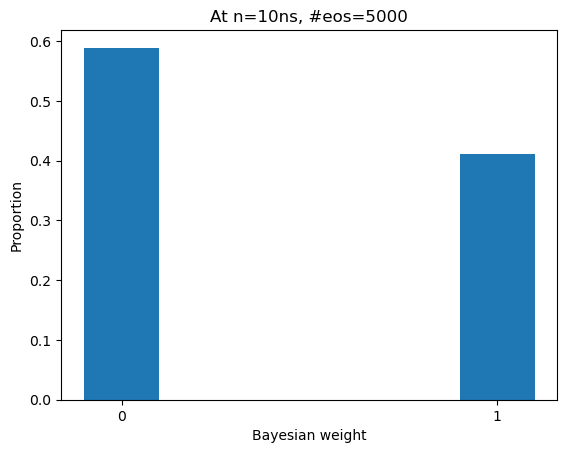

In [7]:
num_sets = len(edens)

hist, bins = np.histogram(weights, bins=[-0.1,0.1,0.9,1.1])
hist = hist / len(weights) 

plt.hist(bins[:-1], bins, weights=hist)
plt.xlabel('Bayesian weight')
plt.ylabel('Proportion')
plt.title(f'At n={n_end}ns, #eos={num_sets}')
plt.xticks([0, 1])
plt.show()

In [150]:
num_sets = len(edens)
weights = []

for i in range(len(edens)):
    pQCDX = pQCD(np.exp(X_hats[i]))
    weights.append(int(pQCDX.constraints(e0=edens[i][-1], p0=prezzes[i][-1], n0=n_end*0.16)))

In [106]:
N = 1000
num_sets = len(edens)
weights = []

for n in range(num_sets):
    weight_indiv_eos = np.zeros(N)
    for i in range(N):
        X = np.random.uniform(np.log(1/2), np.log(2))  # Log-linear distribution
        pQCDX = pQCD(np.exp(X))  # Redefine class with new X
        weight_indiv_eos[i] = int(pQCDX.constraints(e0=edens[n][-1], p0=prezzes[n][-1], n0=n_end*0.16))
    weights.append(weight_indiv_eos.mean())

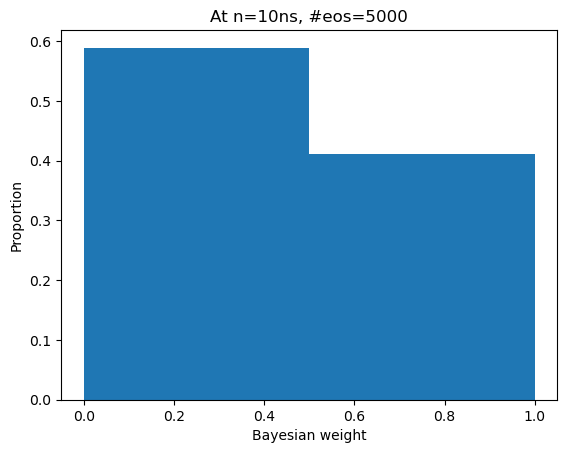

In [153]:
hist, bins = np.histogram(weights, bins=[0,0.5,1])
hist = hist / len(weights) 

plt.hist(bins[:-1], bins, weights=hist)
plt.xlabel('Bayesian weight')
plt.ylabel('Proportion')
plt.title(f'At n={n_end}ns, #eos={len(edens)}')
plt.show()